In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_wine, load_breast_cancer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score
plt.rcParams['figure.figsize'] = (19,11)
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20

In [2]:
dt = load_breast_cancer()
data = pd.DataFrame(dt.data, columns = dt.feature_names)
data['target'] = dt.target
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


As expected dataset is clean, let's split it

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1])

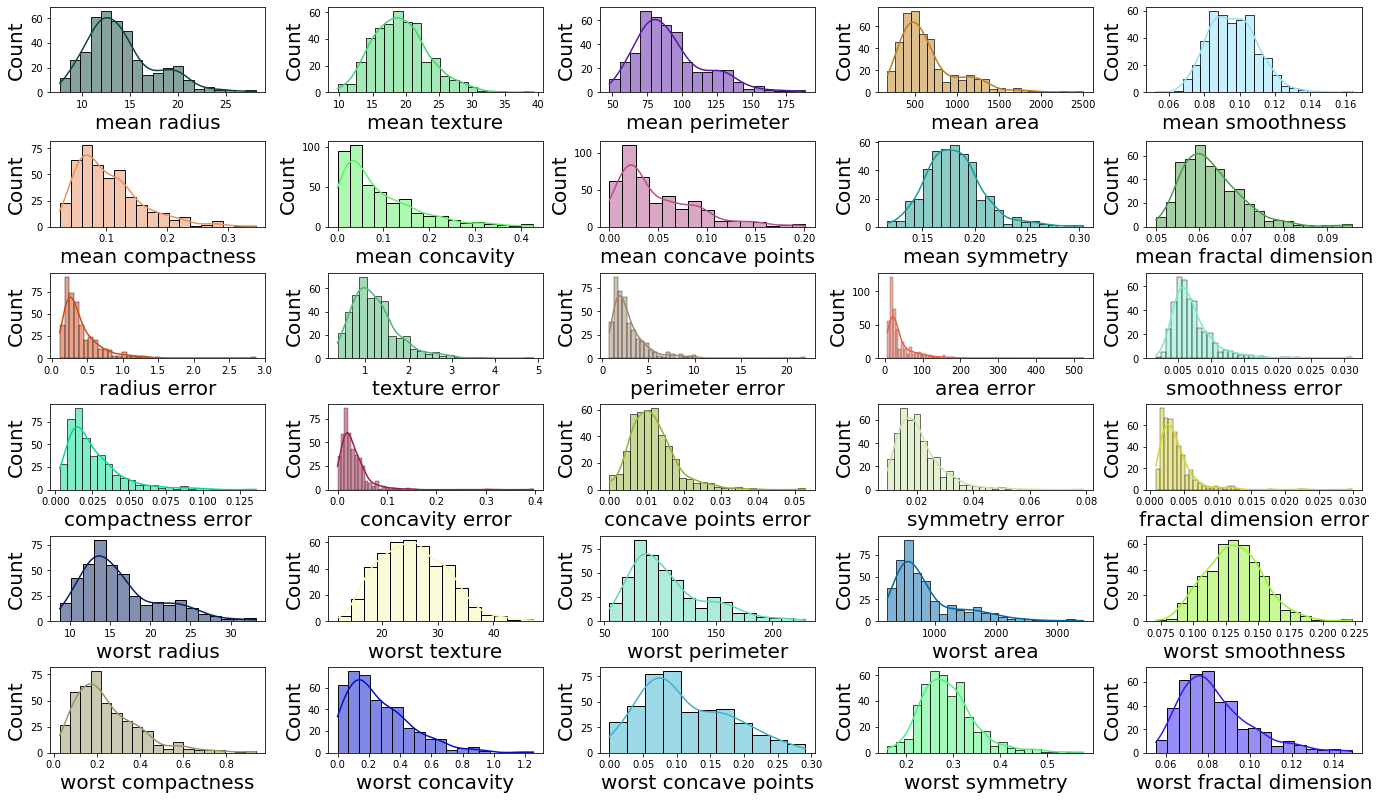

In [4]:
fig, axes = plt.subplots(6,5, constrained_layout = True)
for col, ax in zip(X_train.columns, axes.ravel()):
    sns.histplot(data = X_train, x = col, kde = True, ax = ax, color = np.random.random(3))

Scaling data

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Baseline models: Logistic Regression, Random Forest, Gradient boosting, SVM

In [6]:
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svm = SVC()

lr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
gb.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)

print(f'lr: train score {np.round(recall_score(y_train, lr.predict(X_train_scaled)), 3)}| test_score {np.round(recall_score(y_test, lr.predict(X_test_scaled)), 3)}')
print(f'rf: train score {np.round(recall_score(y_train, rf.predict(X_train_scaled)), 3)}| test_score {np.round(recall_score(y_test, rf.predict(X_test_scaled)), 3)}')
print(f'gb: train score {np.round(recall_score(y_train, gb.predict(X_train_scaled)), 3)}| test_score {np.round(recall_score(y_test, gb.predict(X_test_scaled)), 3)}')
print(f'svm: train score {np.round(recall_score(y_train, svm.predict(X_train_scaled)), 3)}| test_score {np.round(recall_score(y_test, svm.predict(X_test_scaled)), 3)}')

lr: train score 0.993| test_score 1.0
rf: train score 1.0| test_score 0.988
gb: train score 1.0| test_score 0.976
svm: train score 1.0| test_score 0.988


At first glance, logistic regression is performing better: it's the only one not overfittinge
<br>
Let's do a grid search over parameters
<br>
Due to the nature of the problem, we want to maximize the recall as score, because we don't want to missmatch a malignant tumor with a benign one

In [7]:
lr_params = {'C': [0.1, 0.5, 0.7,  1]}
lr_grid = GridSearchCV(LogisticRegression(n_jobs = -1), lr_params, scoring = 'recall_micro')
lr_grid.fit(X_train_scaled, y_train)

print(f'lr best parameters {lr_grid.best_params_}')
print(f'lr: best train score {np.round(lr_grid.score(X_train_scaled, y_train), 3)}| mean validation score {np.round(lr_grid.best_score_, 3)}| test score {np.round(lr_grid.score(X_test_scaled, y_test), 3)}')

lr best parameters {'C': 0.5}
lr: best train score 0.986| mean validation score 0.979| test score 0.979


There isn't any improvement 

In [8]:
rf_params = {'max_depth':[i for i in range(1,6)],
             'n_estimators':[i*10 for i in range(5,16)]}
rf_grid = GridSearchCV(RandomForestClassifier(max_features = 'sqrt', n_jobs = -1), rf_params, scoring = 'recall_micro')
rf_grid.fit(X_train_scaled, y_train)

print(f'rf best parameters {rf_grid.best_params_}')
print(f'rf: best train score {np.round(rf_grid.score(X_train_scaled, y_train), 3)}| mean validation score {np.round(rf_grid.best_score_, 3)}| test score {np.round(rf_grid.score(X_test_scaled, y_test), 3)}')

rf best parameters {'max_depth': 5, 'n_estimators': 150}
rf: best train score 0.998| mean validation score 0.967| test score 0.958


Slightly reduced overfitting, still not the best model

In [9]:
gb_params = {'max_depth':[i for i in range(1,6)],
             'n_estimators':[i*10 for i in range(5,16)],
             'learning_rate':[0.001, 0.01, 0.1]}
gb_grid = GridSearchCV(GradientBoostingClassifier(max_features = 'sqrt'), gb_params, scoring = 'recall_micro')
gb_grid.fit(X_train_scaled, y_train)

print(f'gb best parameters {gb_grid.best_params_}')
print(f'gb: best train score {np.round(gb_grid.score(X_train_scaled, y_train), 3)}| mean validation score {np.round(gb_grid.best_score_, 3)}| test score {np.round(gb_grid.score(X_test_scaled, y_test), 3)}')

gb best parameters {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
gb: best train score 1.0| mean validation score 0.977| test score 0.951


Reduced overfitting

In [10]:
svm_params = {'C': [0.1, 0.5, 0.7,  1, 2, 5, 10],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid'] }
svm_grid = GridSearchCV(SVC(), svm_params, scoring = 'recall_micro')
svm_grid.fit(X_train_scaled, y_train)

print(f'gb best parameters {svm_grid.best_params_}')
print(f'gb: best train score {np.round(svm_grid.score(X_train_scaled, y_train), 3)}| mean validation score {np.round(svm_grid.best_score_, 3)}| test score {np.round(svm_grid.score(X_test_scaled, y_test), 3)}')

gb best parameters {'C': 1, 'kernel': 'rbf'}
gb: best train score 0.991| mean validation score 0.981| test score 0.965


Reduced overfitting

The best models are logistic regression and svm, let's compare the distributions of accuracy

Logistic regression mean Score: 0.9774545454545454| Standard deviation: 0.012355723189883094
SVM mean Score: 0.9735664335664335| Standard deviation: 0.012946698358509385


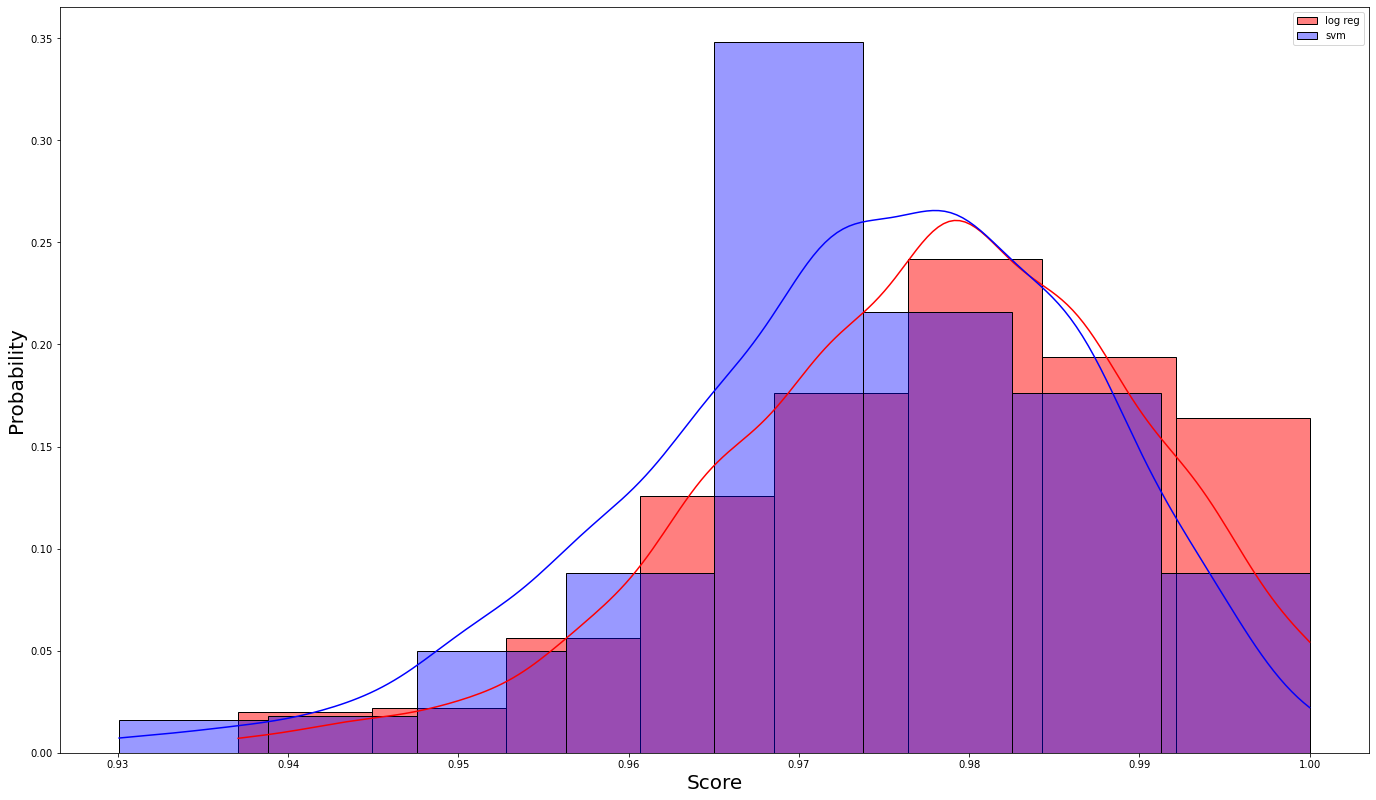

In [11]:
scores_lr = []
scores_svm = []

for i in range(500):
    xtrain, xtest, ytrain, ytest = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], random_state=i)
    xtrains = scaler.fit_transform(xtrain)
    xtests = scaler.transform(xtest)
    
    best_lr = lr_grid.best_estimator_
    best_svm = svm_grid.best_estimator_
    best_lr.fit(xtrains, ytrain)
    best_svm.fit(xtrains, ytrain)
    
    scores_lr.append(recall_score(ytest, best_lr.predict(xtests), average='micro'))
    scores_svm.append(recall_score(ytest, best_svm.predict(xtests), average='micro'))

plt.xlabel('Score')
sns.histplot(x = scores_lr, kde = True, stat = 'probability', bins = 8, label = 'log reg', color = 'red')
sns.histplot(x = scores_svm, kde = True, stat = 'probability', bins = 8, label = 'svm', color = 'blue', alpha = 0.4)
plt.legend()

print(f'Logistic regression mean Score: {np.mean(scores_lr)}| Standard deviation: {np.std(scores_lr)}')
print(f'SVM mean Score: {np.mean(scores_svm)}| Standard deviation: {np.std(scores_svm)}')

Logistic regression distribution is a little bit wider, meaning that svm has a slightly more solid performance. 
<br>
We see the calssification report of these two models as final metric

In [12]:
print('LOGISTIC REGRESSION \n\n', classification_report(y_pred=best_lr.predict(X_test_scaled), y_true=y_test,),'\n')
print('SVM \n\n', classification_report(y_pred=best_svm.predict(X_test_scaled), y_true=y_test))

LOGISTIC REGRESSION 

               precision    recall  f1-score   support

           0       1.00      0.97      0.98        58
           1       0.98      1.00      0.99        85

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143
 

SVM 

               precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.97      1.00      0.98        85

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



[Text(0.5, -0.9997599999999984, 'True'),
 Text(686.8400000000001, 0.5, 'Predicted'),
 Text(0.5, 1.0, 'svm')]

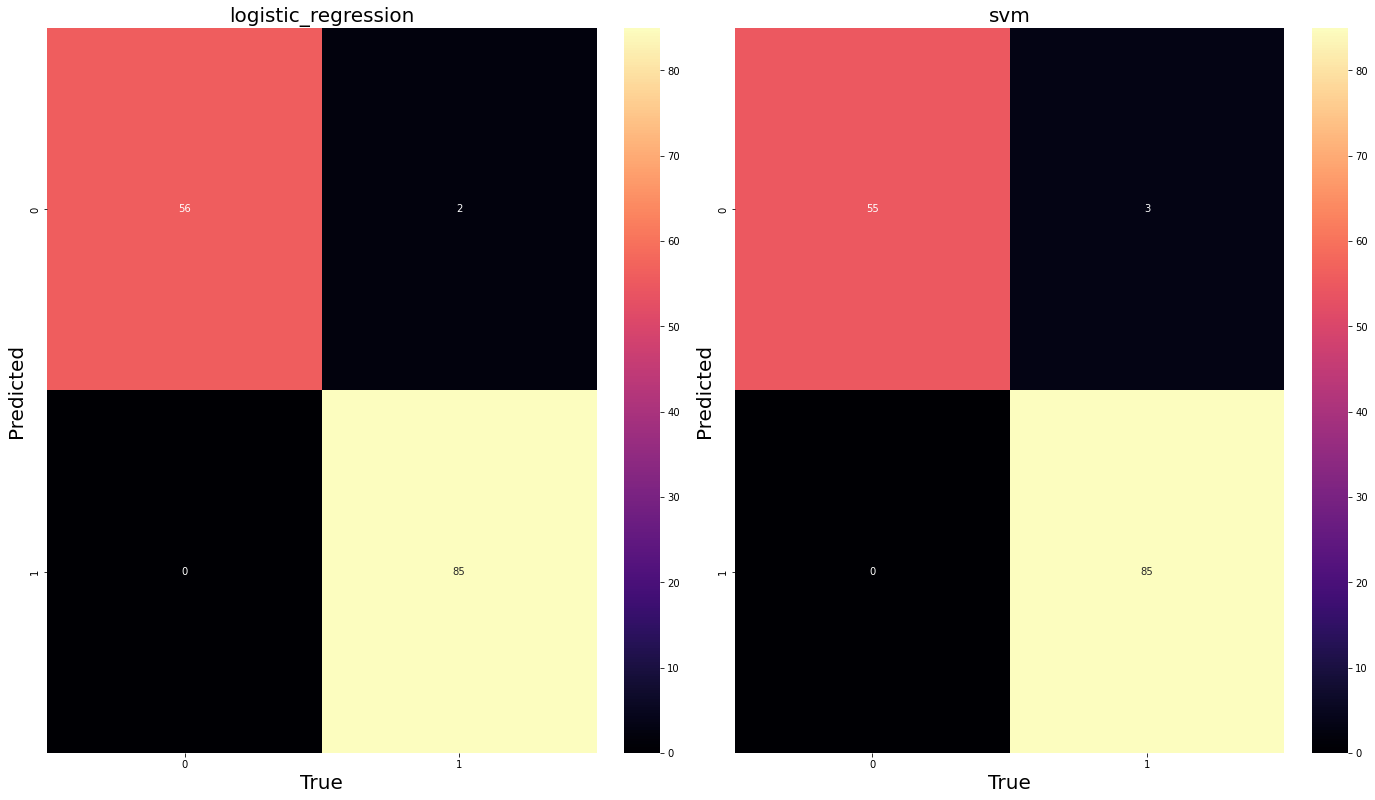

In [13]:
lr_cm = confusion_matrix(y_true=y_test, y_pred=best_lr.predict(X_test_scaled))
svm_cm = confusion_matrix(y_true=y_test, y_pred=best_svm.predict(X_test_scaled))

fig, axes = plt.subplots(1,2, constrained_layout = True)
sns.heatmap(lr_cm, annot = True, cmap = 'magma', ax = axes[0])
sns.heatmap(svm_cm, annot = True, cmap = 'magma', ax = axes[1])
axes[0].set(xlabel = 'True', ylabel = 'Predicted', title = 'logistic_regression')
axes[1].set(xlabel = 'True', ylabel = 'Predicted', title = 'svm')

Conclusion: Basing our model on recall score the best models are svm and logistic regression on this dataset